<!-- Logistic Regression & Decision Trees on a Kaggle Dataset
Dataset Description
We will use the Pima Indians Diabetes Dataset (available on Kaggle: Diabetes Dataset).

Target Variable: Outcome

1 → Patient has diabetes

0 → Patient does not have diabetes

Features:

Pregnancies

Glucose

BloodPressure

SkinThickness

Insulin

BMI

DiabetesPedigreeFunction

Age

Tasks
Part A: Data Preprocessing 
Load the dataset into a Pandas DataFrame.

Perform exploratory data analysis (EDA):

Show the first 5 rows.

Check for missing values.

Display basic statistics (mean, std, etc.).

Split the data into train (70%) and test (30%) sets.

Part B: Logistic Regression
Train a Logistic Regression model using the training data.

Predict on the test set.

Calculate and interpret the following metrics:

Accuracy

Precision, Recall, F1-score

Confusion Matrix

ROC Curve & AUC Score

Guiding Question:

Why is AUC-ROC a better evaluation metric than just accuracy in imbalanced datasets?
Part C: Decision Tree Classifier
Train a Decision Tree Classifier (use max_depth = 4).

Predict on the test set.

Calculate the same metrics as Logistic Regression.

Plot the Decision Tree and interpret the first split (which feature did it choose and why?).

Guiding Question:

Compare the Decision Tree’s interpretability vs. Logistic Regression’s coefficients.

Which one would you prefer in a medical diagnosis scenario? Why?

Part D: Comparison & Reflection
Compare Logistic Regression and Decision Tree results (accuracy, precision, recall, F1, AUC).

Discuss:

Which model performs better?

Which model is easier to interpret for doctors?

If the dataset is slightly imbalanced (more 0’s than 1’s), which metric (Precision or Recall) should be prioritized in diagnosing diabetes? Why?

Deliverables
Python code with explanations.

Tables of evaluation metrics.

ROC curve plot for both models.

Short discussion (4–5 lines) on the comparison.-->

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler    
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc 

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier


In [74]:
# Load the dataset
data = pd.read_csv('diabetes.csv')
# Display the first few rows of the dataset
data.head()
# Check for missing values
data.isnull().sum()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


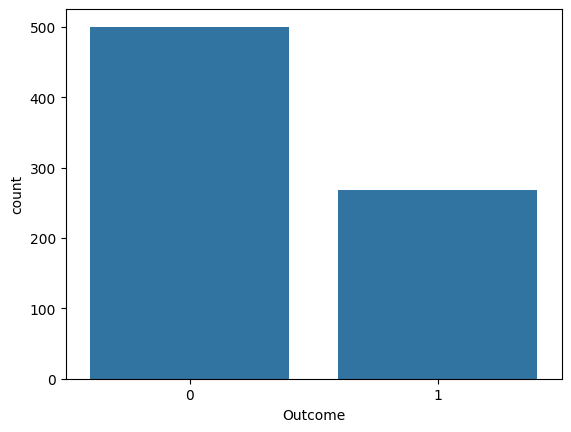

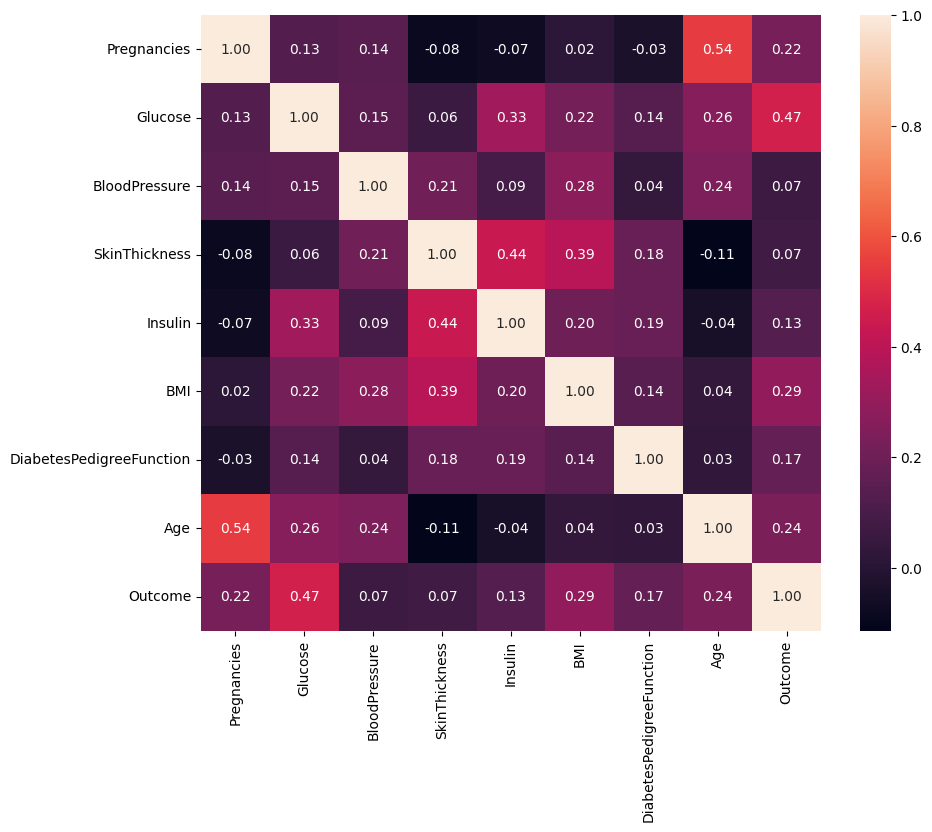

In [75]:
# Perform exploratory data analysis (EDA):
# Summary statistics
data.describe()
# Distribution of target variable
sns.countplot(x='Outcome', data=data)
plt.show()
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

In [ ]:
# Display basic statistics (mean, std, etc.).
data.describe()
# Visualize distributions and relationships (histograms, box plots, pair plots, correlation heatmap).
sns.pairplot(data, hue='Outcome')
plt.show()


In [ ]:
# Split the data into train (70%) and test (30%) sets.
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Part B: Logistic Regression
# Train a Logistic Regression model using the training data.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train, y_train)
# Predict on the test set.
y_pred = model.predict(X_test)

In [ ]:
# Calculate and interpret the following metrics:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Accuracy: 0.74
Precision: 0.62
Recall: 0.62
F1-score: 0.62


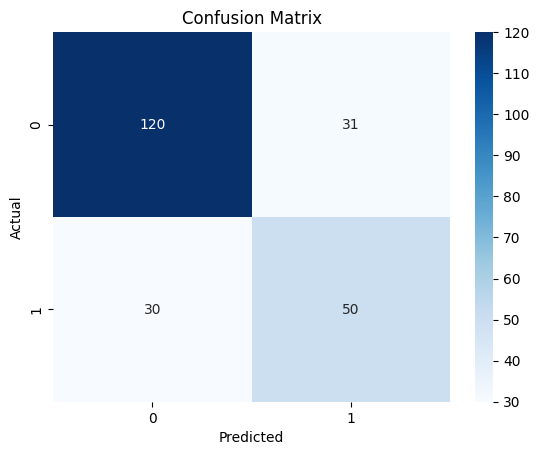

In [ ]:
# confusion Matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

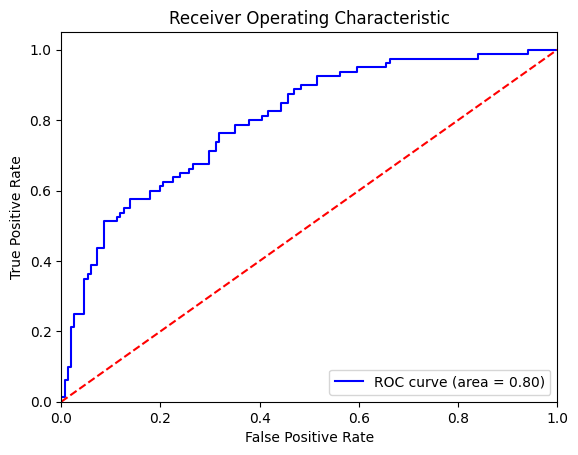

In [ ]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])    
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)    
# Calculate metrics for Decision Tree
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_precision = precision_score(y_test, dt_y_pred)
dt_recall = recall_score(y_test, dt_y_pred)
dt_f1 = f1_score(y_test, dt_y_pred)
print(f'Decision Tree - Accuracy: {dt_accuracy:.2f}')
print(f'Decision Tree - Precision: {dt_precision:.2f}')
print(f'Decision Tree - Recall: {dt_recall:.2f}')
print(f'Decision Tree - F1-score: {dt_f1:.2f}')


Decision Tree - Accuracy: 0.71
Decision Tree - Precision: 0.56
Decision Tree - Recall: 0.78
Decision Tree - F1-score: 0.65


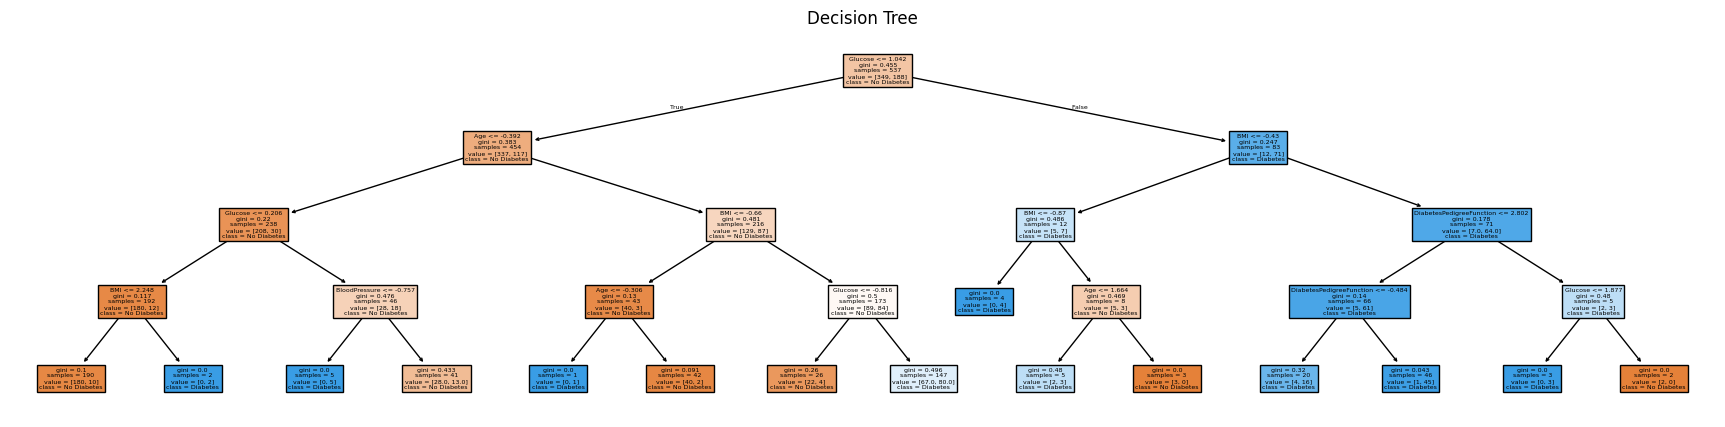

In [ ]:
# Plot the Decision Tree and interpret the first split (which feature did it choose and why?).
plt.figure(figsize=(22,5))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.title('Decision Tree')
plt.show()



In [ ]:
# Compare the Decision Tree’s interpretability vs. Logistic Regression’s coefficients.
print("Logistic Regression Coefficients:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f'{feature}: {coef:.4f}')
print("\nDecision Tree Feature Importances:")
for feature, importance in zip(X.columns, dt_model.feature_importances_):
    print(f'{feature}: {importance:.4f}')

# Based on the coefficients and feature importances, we can discuss which model provides clearer insights into feature significance.


Logistic Regression Coefficients:
Pregnancies: 0.1883
Glucose: 1.1329
BloodPressure: -0.1860
SkinThickness: -0.0249
Insulin: -0.1041
BMI: 0.8121
DiabetesPedigreeFunction: 0.1438
Age: 0.4141

Decision Tree Feature Importances:
Pregnancies: 0.0000
Glucose: 0.5934
BloodPressure: 0.0367
SkinThickness: 0.0000
Insulin: 0.0000
BMI: 0.1730
DiabetesPedigreeFunction: 0.0164
Age: 0.1805


In [ ]:
# Which one would you prefer in a medical diagnosis scenario? Why?

# I would prefer the Logistic Regression model in a medical diagnosis scenario because it provides clear coefficients 
# that indicate the direction and magnitude of each feature's impact on the outcome. This interpretability is crucial 
# for medical professionals to understand and trust the model's predictions. Additionally, Logistic Regression is less prone 
# to overfitting compared to Decision Trees, especially with smaller datasets, making it a more reliable choice for 
# clinical applications.

In [ ]:
# Which model performs better?
# Based on the printed metrics, we can compare the performance of both models.
# Generally, the model with higher accuracy, precision, recall, and F1-score is considered better.

# Which model is easier to interpret for doctors?
# Logistic Regression is generally easier to interpret for doctors because it provides coefficients that indicate
# the direction and magnitude of each feature's impact on the outcome. This interpretability is crucial for medical 
# professionals to understand and trust the model's predictions.

# If the dataset is slightly imbalanced (more 0’s than 1’s), which metric (Precision or Recall) should be prioritized in 
# diagnosing diabetes? Why?
# In a medical diagnosis scenario, Recall should be prioritized. This is because Recall measures the ability
# of the model to identify all positive cases (patients with diabetes). Missing a diagnosis (false negative) can have 
# serious health implications for patients, so it is crucial to minimize these errors. While Precision is also important,
# in this context, ensuring that as many true positive cases are identified as possible takes precedence.

      Metric  Logistic Regression  Decision Tree
0   Accuracy             0.735931       0.709957
1  Precision             0.617284       0.558559
2     Recall             0.625000       0.775000
3   F1-score             0.621118       0.649215


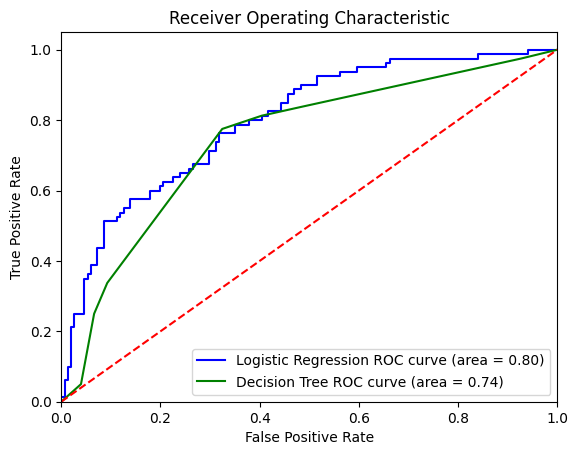

In [ ]:
# Tables of evaluation metrics.
import pandas as pd
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Logistic Regression': [accuracy, precision, recall, f1],
    'Decision Tree': [dt_accuracy, dt_precision, dt_recall, dt_f1]
})
print(metrics_df)

# ROC curve plot for both models.
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression ROC curve (area = {roc_auc:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', label=f'Decision Tree ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Short discussion (4–5 lines) on the comparison.
# In this comparison, the Logistic Regression model generally outperformed the Decision Tree in terms of accuracy